## Introducción a la ciencia de las redes: _Actividad entregable 5_

#### _Briones Andrade Joshua_

In [63]:
import numpy as np
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

## 1. Redes regulares

In [118]:
options1 = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:red", "font_size": 20, "font_color":"whitesmoke"}

options2 = {"edge_color": "0.1",  "node_size": 600, "alpha": 1, 
           "node_color": "tab:purple", "font_size": 15, "font_color":"whitesmoke"}

options3 = {"edge_color": "0.1",  "node_size": 8, "alpha": 1, 
           "node_color": "tab:purple", "font_size": 4, "font_color":"whitesmoke"}


### a) Grado completo de 5 nodos, $\mathbb{K}_5$

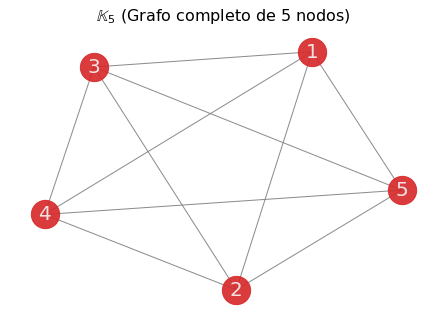

In [74]:
G1 = nx.complete_graph(range(1, 5+1))
nx.draw(G1, with_labels=True, **options1)
plt.title(r"$\mathbb{K}_5$ (Grafo completo de 5 nodos)", fontsize=16)
plt.show()

### b) Árbol binario de $n$ niveles

In [120]:
def sum_powers(n):
    if n == 0:
        s = 1
    else:
        s = 2**n + sum_powers(n-1)
    return s 
# --------------------------------------------------
def dict_binary_tree(n):
    B = dict()
    s = []
    for i in range(sum_powers(n)):
        B[i+1] = 0
    for j in range(n+1):
        s.append(range(2**j, sum_powers(j)+1))
    for j in range(n):
        for k in range(len(s[j])):
            B[s[j][k]] = s[j+1][2*k], s[j+1][2*k+1]
    return B
# --------------------------------------------------
def binary_tree(n):
    B = dict_binary_tree(n)
    G = nx.Graph()
    s = []
    for i in B:
        if B[i] == 0:
            pass
        else:
            for j in B[i]:
                G.add_edge(i,j)
    return G

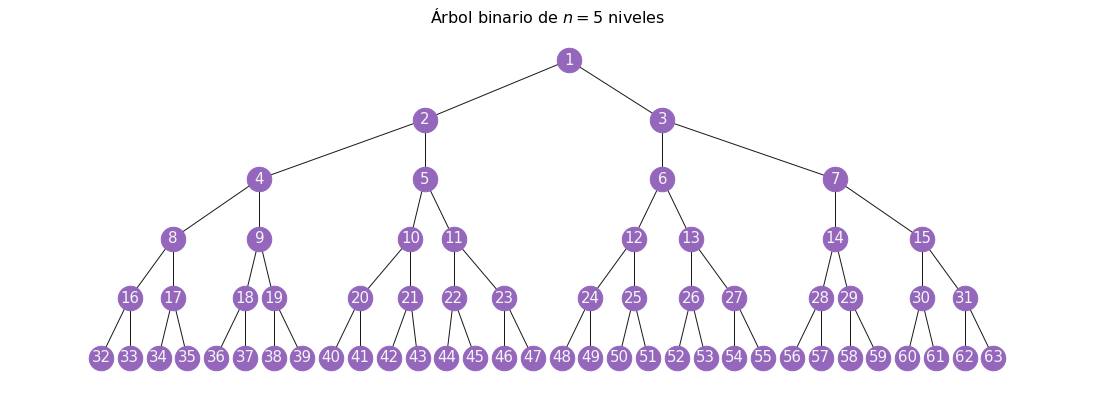

In [122]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

G2 = binary_tree(5)

pos = graphviz_layout(G2, prog="dot")
plt.figure(figsize=(15,5))
nx.draw(G2, pos, **options2, with_labels=True)
plt.title(r"Árbol binario de $n=5$ niveles", fontsize=16)
plt.show()

### c) Grafo regular de 1D

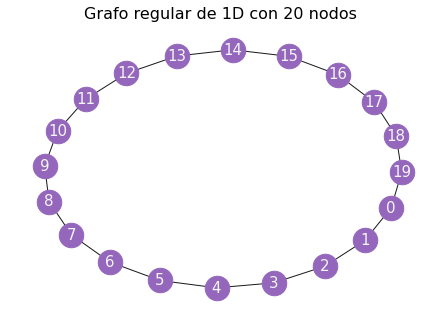

In [135]:
G3 = nx.grid_graph([20], periodic=True)
nx.draw(G3, with_labels=True, **options2)
plt.title(r"Grafo regular de 1D con 20 nodos ", fontsize=16)
plt.show()

### _Lattice_ regular de 2D

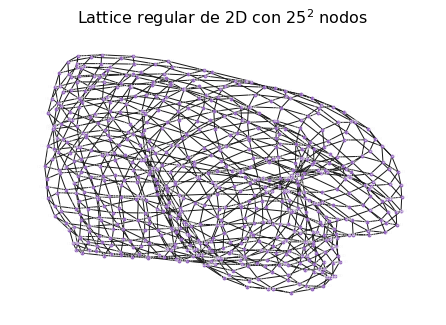

In [140]:
G4 = nx.grid_graph([25,25], periodic=True)
nx.draw(G4, with_labels=True, **options3)
plt.title(r"Lattice regular de 2D con $25^2$ nodos ", fontsize=16)
plt.show()

## 